In [2]:
import os

from rembg import remove

import matplotlib.pyplot as plt

import cv2

import numpy as np

In [3]:
# we define a helper function to print the image using `matplotlib`

# this prints colored image
def print_image(img, isGray=False, title="Image"):
    # OpenCV reads images in BGR, and matplotlib reads images in RGB
    # so, we switch the color channels using `cvtColor` method
    
    # if isGray = True, we first grayscale the image using the same `cvtColor` method
    if isGray:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_colored = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    else:
        img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,6))
    plt.imshow(img_colored)
    plt.axis(False)
    plt.title(title)
    plt.show()


In [4]:
# define helper fucntion to extract pathname of images in a folder

def extract_path(dir_path):
    # Create a list to store the file paths
    file_paths = []

    # Loop through all files in the directory
    for filename in os.listdir(dir_path):
        # Check if the file is an image file (e.g. .jpg, .jpeg, .png, .jfif etc.)
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png") or filename.endswith(".jfif"):
            # Add the full file path to the list
            file_paths.append(os.path.join(dir_path, filename))
    
    return file_paths

In [5]:
# laser cut images path
laser_dxf_folder_path = os.path.join('data', 'cad_data', 'laser_parts_dxf')
img_paths = extract_path(laser_dxf_folder_path)
len(img_paths)

14

In [10]:
def flip_col(img_path, padding=175):
    # read as grayscale
    img = cv2.imread(img_path, 0)
    img = cv2.bitwise_not(img)
    min_con = np.min(img)
    threshold = min_con + padding

    h,w = img.shape
    for i in range(h):
        for j in range(w):
            if img[i][j] > threshold:
                img[i][j] = 255
            else:
                img[i][j] = 0
    
    return img

In [7]:
for img_path in img_paths:
    print(img_path.split('/')[-1])

drawing1.jpg
drawing3.jpg
drawing2.jpg
drawing6.jpg
drawing7.jpg
drawing5.jpg
drawing4.jpg
drawing9.jpg
drawing8.jpg
drawing14.jpg
drawing11.jpg
drawing10.jpg
drawing12.jpg
drawing13.jpg


In [8]:
# processef drawing folder path
laser_dxf_processed_folder_path = os.path.join('data', 'cad_data', 'laser_parts_dxf_processed')
laser_dxf_processed_folder_path

'data/cad_data/laser_parts_dxf_processed'

Image written successfully


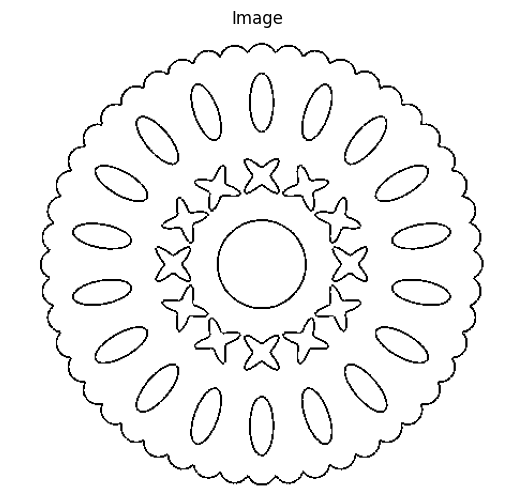

Image written successfully


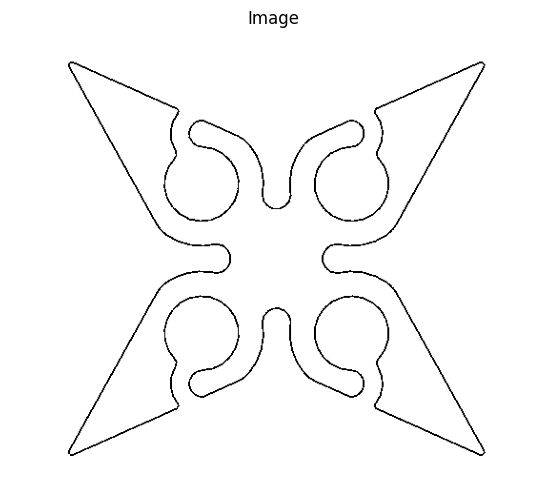

Image written successfully


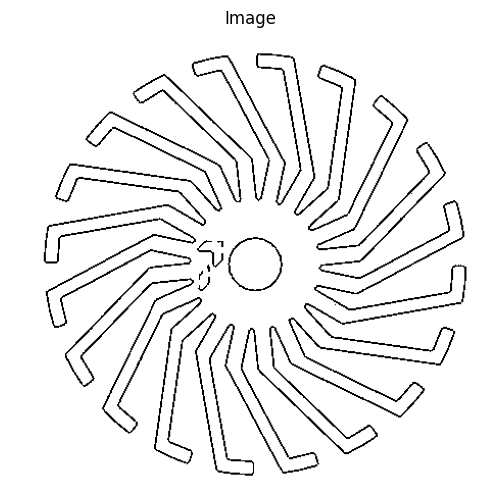

Image written successfully


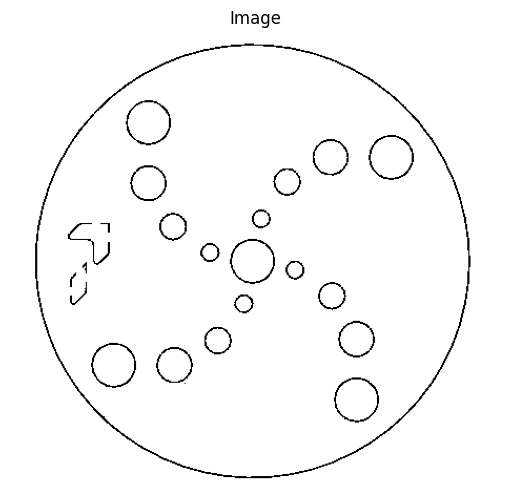

Image written successfully


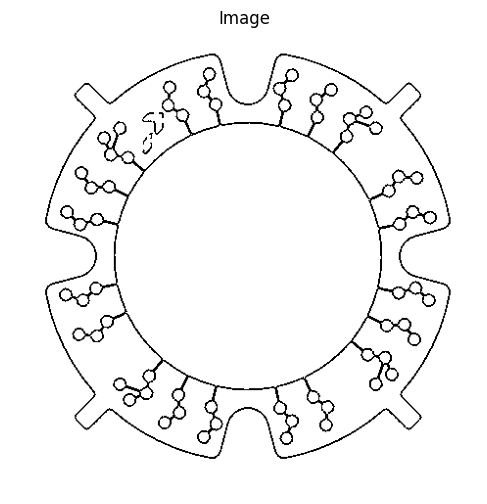

Image written successfully


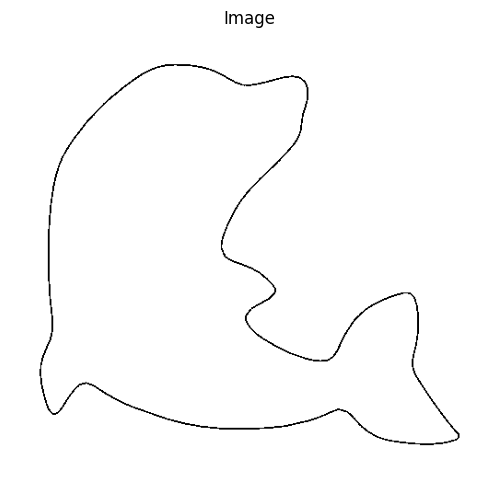

Image written successfully


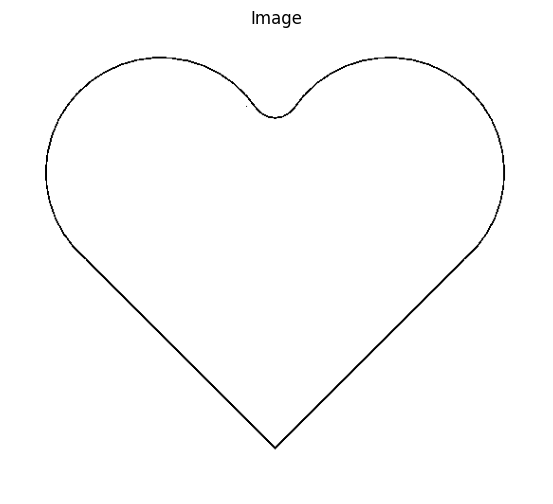

Image written successfully


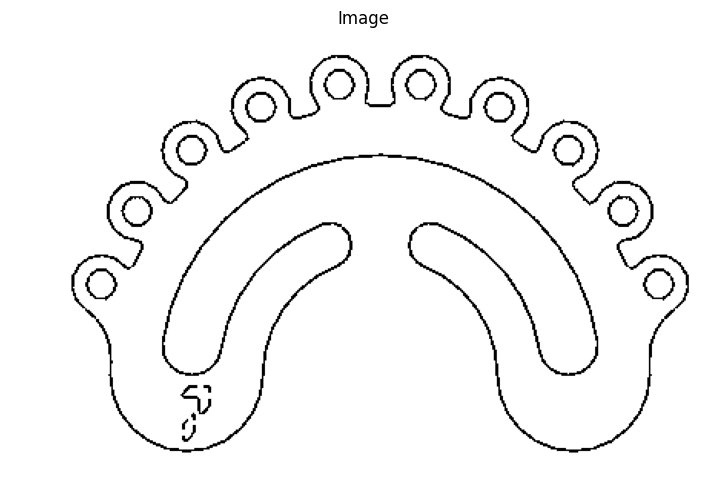

Image written successfully


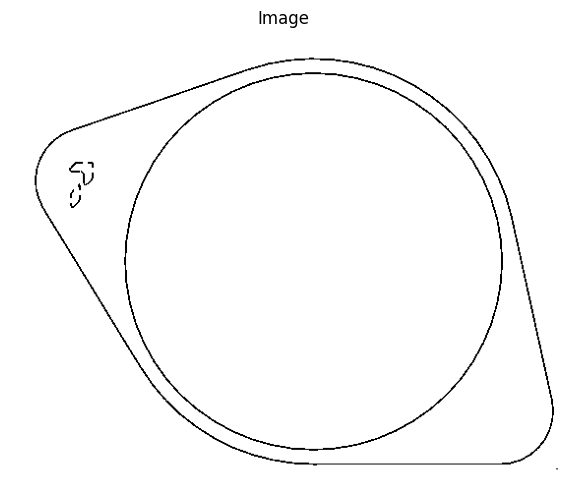

Image written successfully


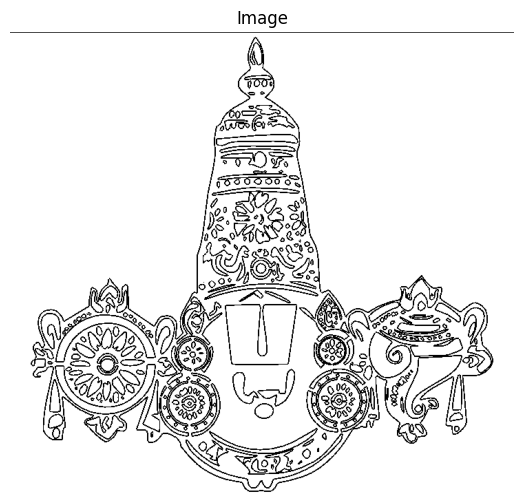

Image written successfully


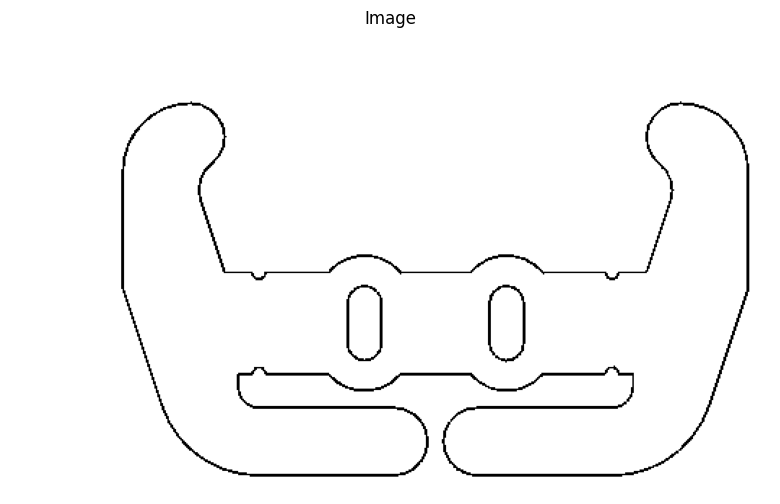

Image written successfully


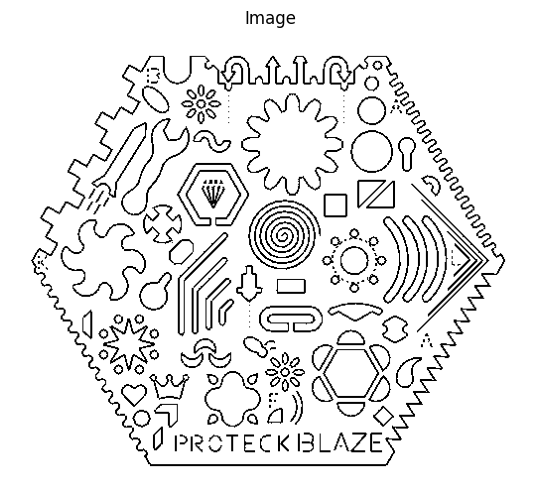

Image written successfully


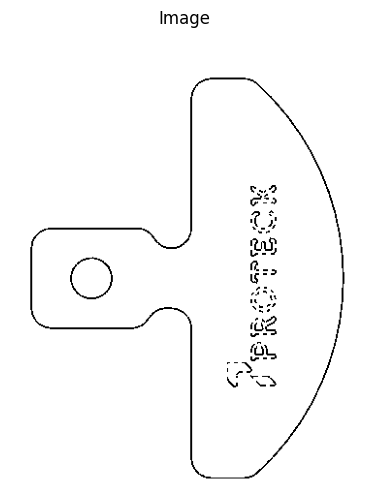

Image written successfully


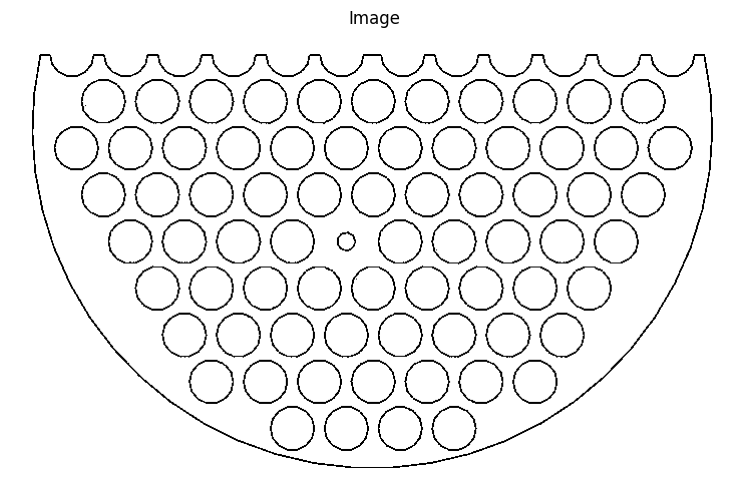

In [11]:
for img_path in img_paths:
    img_name = img_path.split('/')[-1]
    flipped_img = flip_col(img_path, padding=200)
    img_write_path = os.path.join(laser_dxf_processed_folder_path, img_name)
    success = cv2.imwrite(img_write_path, flipped_img)
    if success:
        print('Image written successfully')
    else:
        print('Failed to write image')
    
    print_image(flipped_img)

In [11]:
def invert_col(img_path):
    img = cv2.imread(img_path, 0)
    img_inverted = cv2.bitwise_not(img)
    return img_inverted

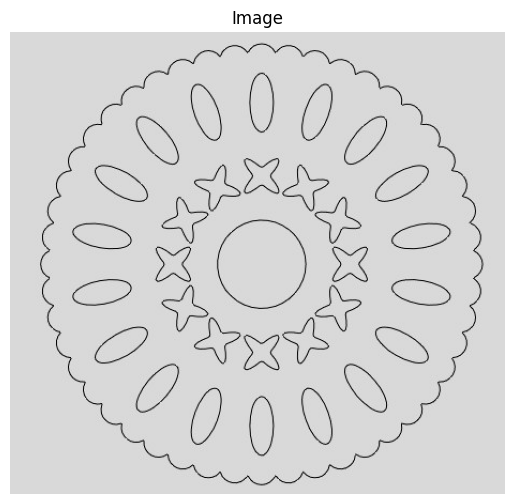

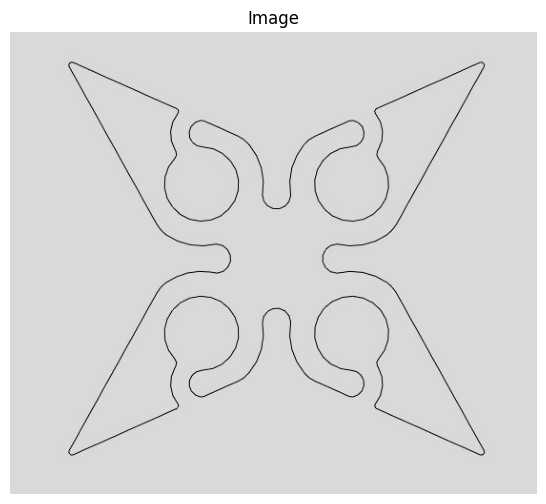

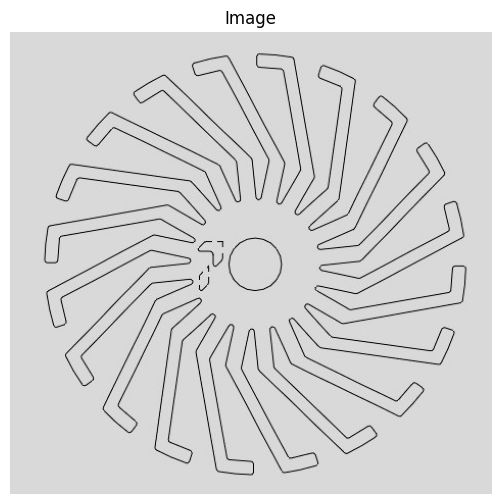

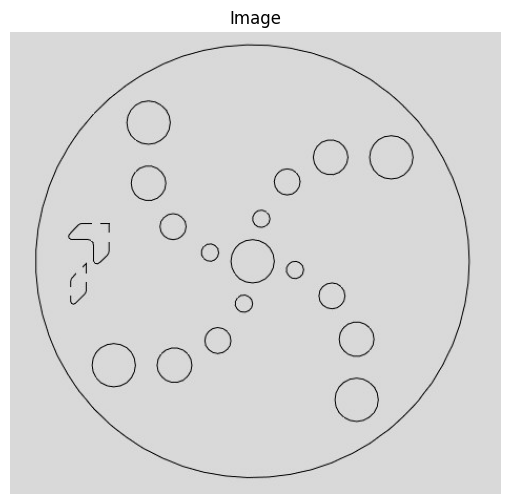

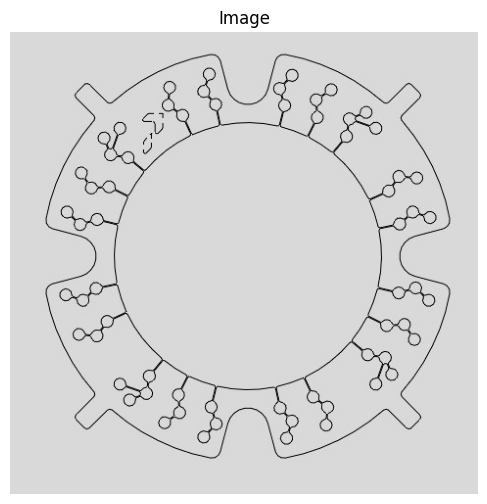

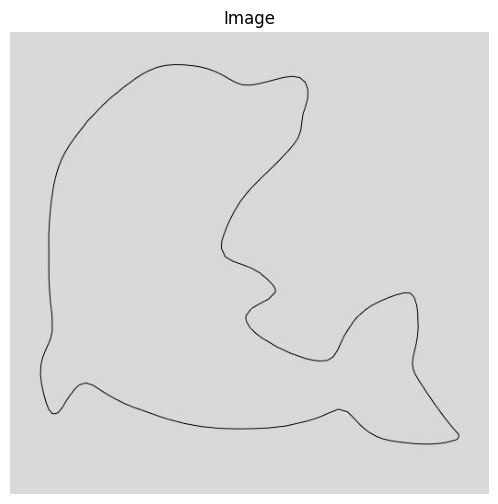

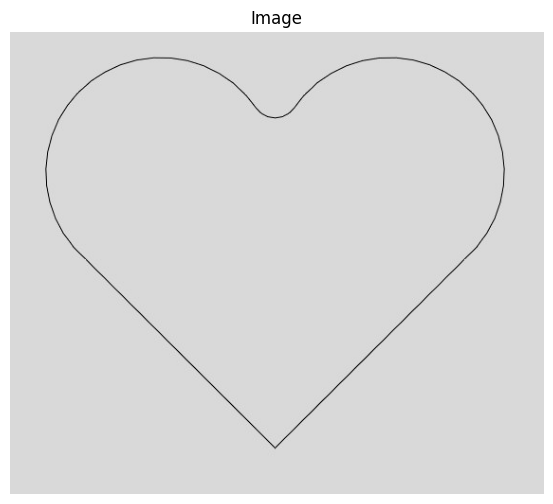

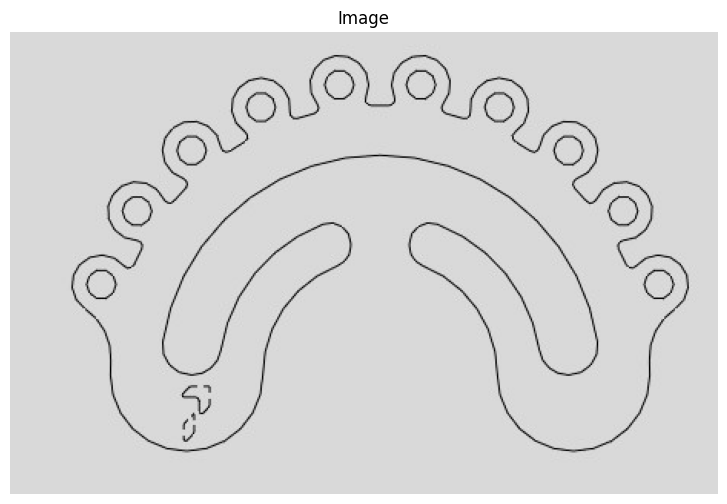

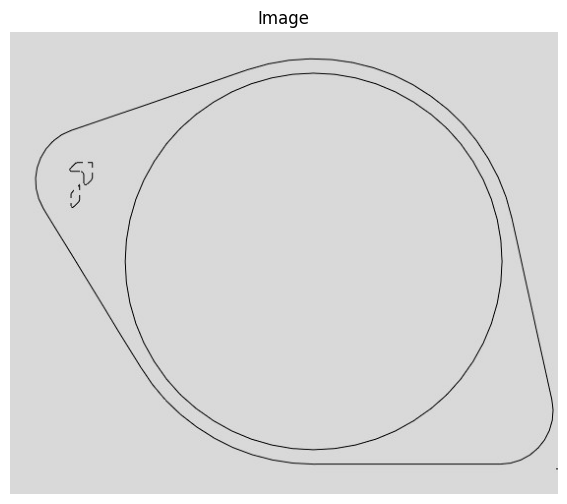

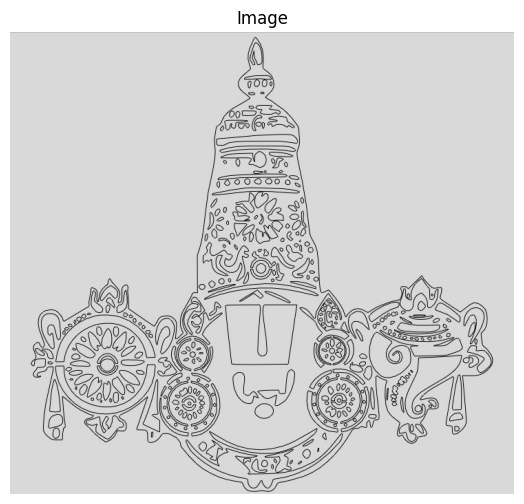

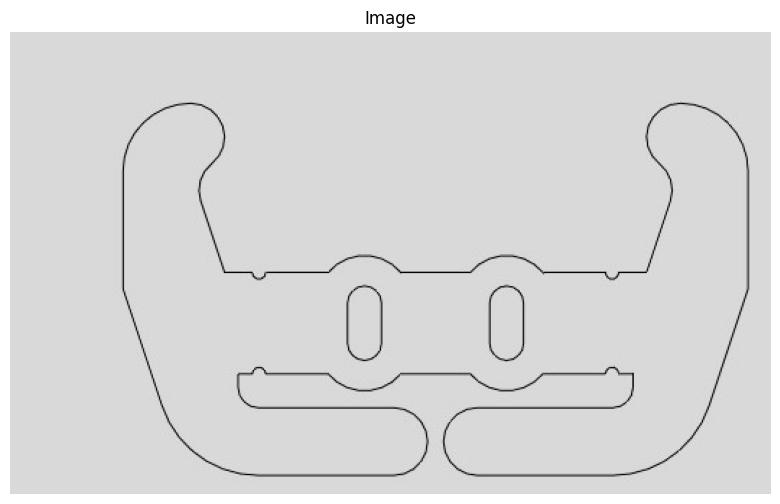

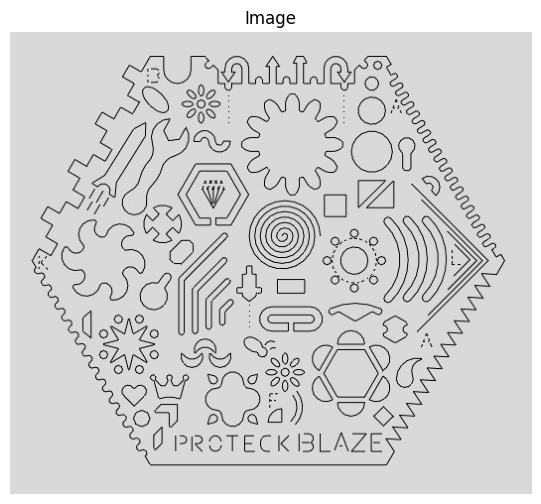

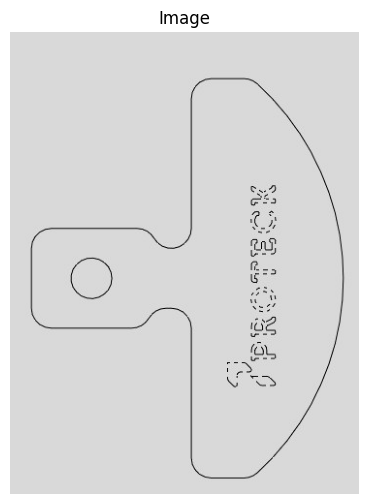

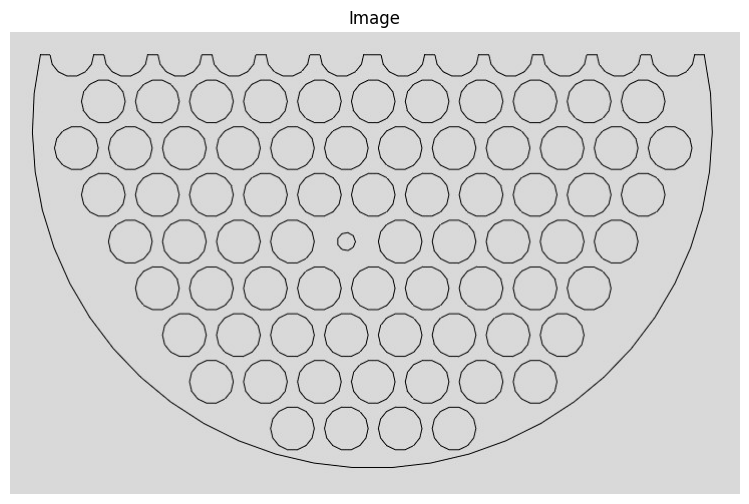

In [12]:
for img_path in img_paths:
    flipped_img = invert_col(img_path)
    print_image(flipped_img)

In [ ]:
%%time